In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

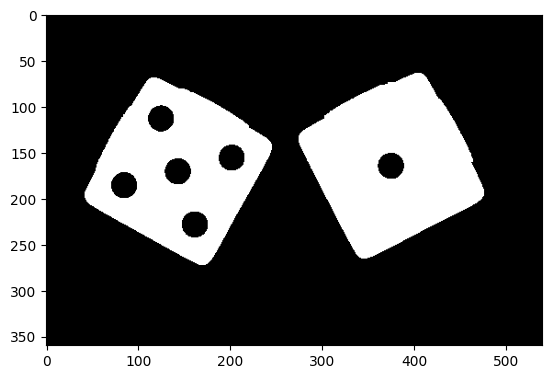

In [2]:
org_img = cv.imread('3.jpg', 0)
img = org_img.copy()

_, img = cv.threshold(img, 100, 255, cv.THRESH_BINARY)
img = cv.morphologyEx(img, cv.MORPH_OPEN, np.ones((4,4)))

plt.imshow(img, 'gray')

In [3]:
contours, h = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
hierarchy = h[0]

5
1


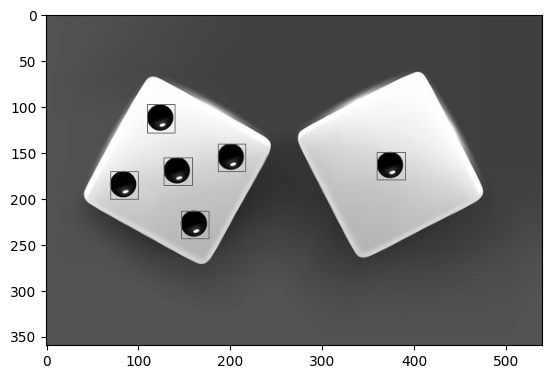

In [4]:
parents=[hie[3] for hie in hierarchy]
for i in range(len(parents)):
    if parents[i] != -1:
        x, y, w, h = cv.boundingRect(contours[i])
        cv.rectangle(org_img, (x,y), (x+w,h+y), (100,100,100), 1)
        
plt.imshow(org_img, 'gray')
cv.imwrite('huh.jpg', org_img)

dices=[]
for p in parents:
    if p != -1 and p not in dices:
        dices.append(p)
        
for dice in dices:
    print(parents.count(dice))